# EDA for Project 3: Interactive Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import json
import plotly.graph_objects as go
import nbformat

In [2]:
grades = {
    ('S1', 'Midterm 1'): 78,
    ('S1', 'Midterm 2'): 82,
    ('S1', 'Final'): 91,  # 182/2
    
    ('S2', 'Midterm 1'): 82,
    ('S2', 'Midterm 2'): 85,
    ('S2', 'Final'): 90,  # 180/2
    
    ('S3', 'Midterm 1'): 77,
    ('S3', 'Midterm 2'): 90,
    ('S3', 'Final'): 94,  # 188/2
    
    ('S4', 'Midterm 1'): 75,
    ('S4', 'Midterm 2'): 77,
    ('S4', 'Final'): 74.5,  # 149/2
    
    ('S5', 'Midterm 1'): 67,
    ('S5', 'Midterm 2'): 77,
    ('S5', 'Final'): 78.5,  # 157/2
    
    ('S6', 'Midterm 1'): 71,
    ('S6', 'Midterm 2'): 64,
    ('S6', 'Final'): 87.5,  # 175/2
    
    ('S7', 'Midterm 1'): 64,
    ('S7', 'Midterm 2'): 33,
    ('S7', 'Final'): 55,  # 110/2
    
    ('S8', 'Midterm 1'): 92,
    ('S8', 'Midterm 2'): 88,
    ('S8', 'Final'): 92,  # 184/2
    
    ('S9', 'Midterm 1'): 80,
    ('S9', 'Midterm 2'): 39,
    ('S9', 'Final'): 63,  # 126/2
    
    ('S10', 'Midterm 1'): 89,
    ('S10', 'Midterm 2'): 64,
    ('S10', 'Final'): 58,  # 116/2
}

In [3]:
data_rows = []

for student in os.listdir('data/students'):
    for exam_type in os.listdir(f'data/students/{student}'):
        df = pd.read_csv(f'data/students/{student}/{exam_type}/HR.csv')
        df.columns = ['BPM']
        df['BPM'] = df['BPM'].astype(float)

        df['Student'] = student
        df['Exam'] = exam_type
        df['Score'] = grades[(student, exam_type)]

        df = df.reindex(columns=['Student', 'Exam', 'BPM', 'Score'])

        data_rows.append(df)

df = pd.concat(data_rows, ignore_index=True)

## Visual 1: Score Distribution

In [4]:
df = df.groupby('Student').head(38613)
df

Student       Exam    BPM  Score
0           S5  Midterm 2   1.00   77.0
1           S5  Midterm 2  82.00   77.0
2           S5  Midterm 2  85.50   77.0
3           S5  Midterm 2  87.33   77.0
4           S5  Midterm 2  86.25   77.0
...        ...        ...    ...    ...
442346      S9      Final  90.35   63.0
442347      S9      Final  90.00   63.0
442348      S9      Final  89.48   63.0
442349      S9      Final  88.97   63.0
442350      S9      Final  88.42   63.0

[386130 rows x 4 columns]

<Figure size 7200x3600 with 0 Axes>

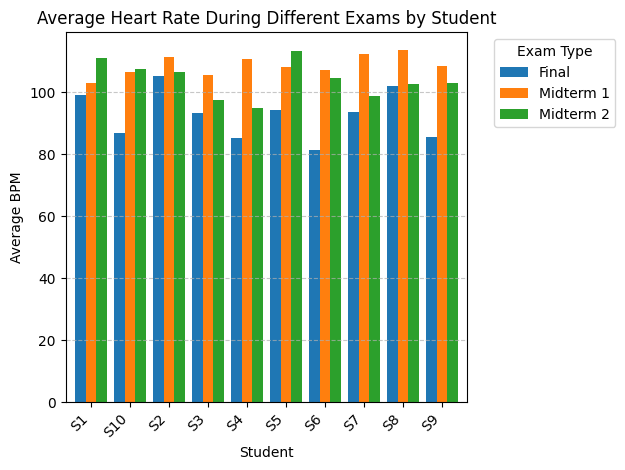

In [5]:
avg_bpm = df.groupby(['Student', 'Exam'])['BPM'].mean().unstack()
plt.figure(figsize=(12, 6), dpi=600)
ax = avg_bpm.plot(kind='bar', width=0.8)

plt.title('Average Heart Rate During Different Exams by Student', fontsize=12)
plt.xlabel('Student', fontsize=10)
plt.ylabel('Average BPM', fontsize=10)
plt.legend(title='Exam Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

<Figure size 7200x3600 with 0 Axes>

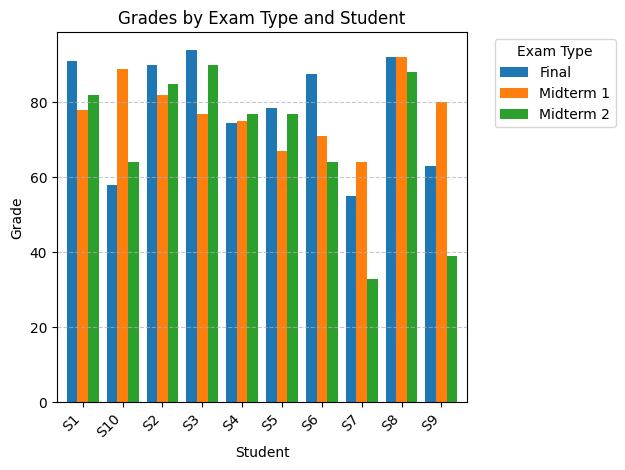

In [6]:
avg_score = df.groupby(['Student', 'Exam'])['Score'].mean().unstack()
plt.figure(figsize=(12, 6), dpi=600)
ax = avg_score.plot(kind='bar', width=0.8)

plt.title('Grades by Exam Type and Student', fontsize=12)
plt.xlabel('Student', fontsize=10)
plt.ylabel('Grade', fontsize=10)
plt.legend(title='Exam Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

Correlation coefficient: 0.110


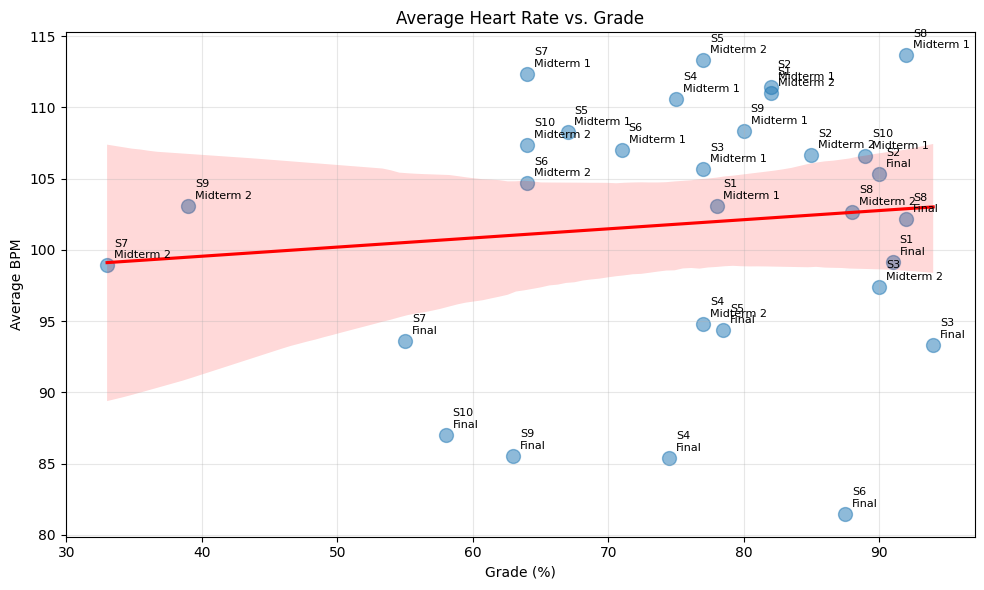

In [7]:
avg_bpm_df = df.groupby(['Student', 'Exam'])['BPM'].mean().reset_index()
avg_bpm_df['Score'] = avg_bpm_df.apply(lambda row: grades[(row['Student'], row['Exam'])], axis=1)
plt.figure(figsize=(10, 6))
sns.regplot(data=avg_bpm_df, x='Score', y='BPM', scatter_kws={'alpha':0.5, 's':100}, line_kws={'color': 'red'})

for _, row in avg_bpm_df.iterrows():
    plt.annotate(f"{row['Student']}\n{row['Exam']}", (row['Score'], row['BPM']), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title('Average Heart Rate vs. Grade')
plt.xlabel('Grade (%)')
plt.ylabel('Average BPM')
plt.grid(True, alpha=0.3)
plt.tight_layout()
correlation = avg_bpm_df['Score'].corr(avg_bpm_df['BPM'])
print(f"Correlation coefficient: {correlation:.3f}")

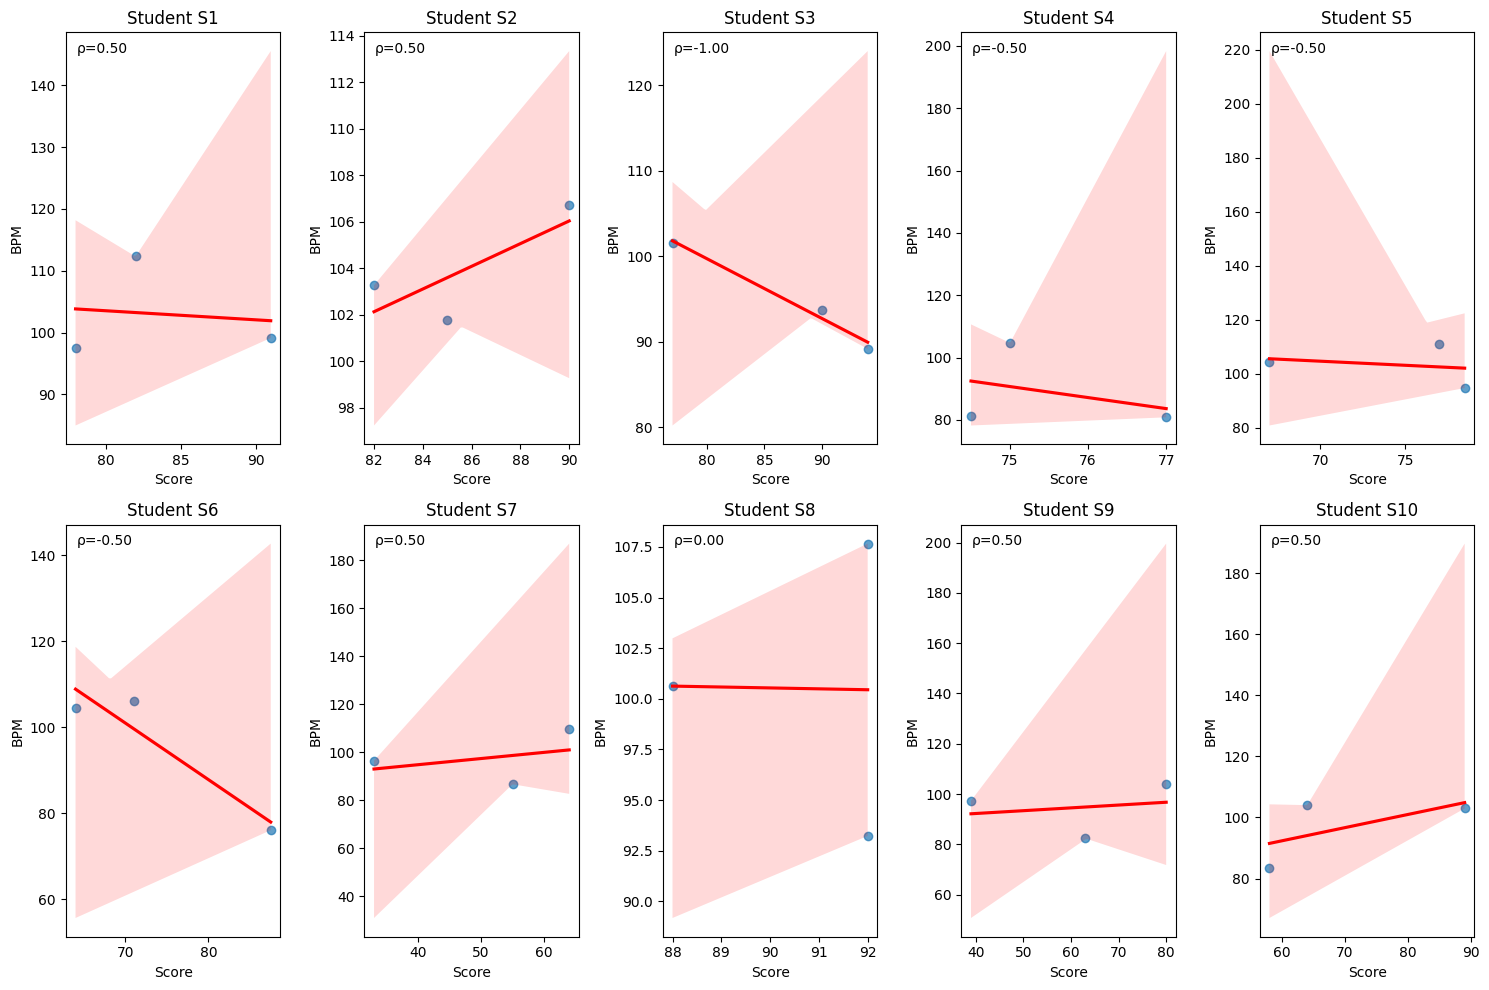

In [8]:
plt.figure(figsize=(15, 10))
for student in df['Student'].unique():
    student_data = df[df['Student'] == student].groupby('Exam')['BPM'].median().reset_index()
    student_data['Score'] = student_data['Exam'].apply(lambda x: grades[(student, x)])
    plt.subplot(2, 5, int(student.replace('S', '')))
    sns.regplot(data=student_data, x='Score', y='BPM', scatter_kws={'alpha':0.7}, line_kws={'color': 'red'})
    plt.title(f'Student {student}')
    correlation = student_data['Score'].corr(student_data['BPM'], method='spearman')
    plt.text(0.05, 0.95, f'ρ={correlation:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()

In [13]:
fig = go.Figure()
colors = px.colors.qualitative.Set3[:len(df['Student'].unique())]

df['time_point'] = df.groupby('Student').cumcount()

for student, color in zip(sorted(df['Student'].unique()), colors):
    student_data = df[df['Student'] == student]
    fig.add_trace(go.Scatter(x=student_data['time_point'], y=student_data['BPM'],
                            name=student, line=dict(color=color)))

fig.update_layout(
    title='Heart Rate Over Time by Student (Final Exam Squished)',
    xaxis_title='Time Point',
    yaxis_title='BPM',
    height=600,
    width=800,
    showlegend=True,
    legend_title='Student'
)

fig.show()

In [14]:
fig.write_html("heart_rate_plot.html")